In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
# from tensorflow.keras.applications.vgg16 import VGG16


In [2]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TF Version: 2.17.0
Num GPUs Available: 0


In [4]:
# import kagglehub

# # Download latest version of dataset
# path = kagglehub.dataset_download("michaeljkerr/20k-album-covers-within-20-genres")

# print("Path to dataset files:", path)

In [3]:
import pandas as pd
import os

genres = ['Blues', 'Classical', 'Country', 'DeathMetal', 'DoomMetal', 'DrumNBass', 'Electronic', 'Folk', 'Grime', 'HeavyMetal', 'HipHop', 'Jazz', 'LoFi', 'Pop', 'PsychedelicRock', 'Punk', 'Reggae', 'Rock', 'Soul', 'Techno']

# Produce one-hot encoding values

genres_dict = {index: genres[index] for index in range(20)}
print(genres_dict)

{0: 'Blues', 1: 'Classical', 2: 'Country', 3: 'DeathMetal', 4: 'DoomMetal', 5: 'DrumNBass', 6: 'Electronic', 7: 'Folk', 8: 'Grime', 9: 'HeavyMetal', 10: 'HipHop', 11: 'Jazz', 12: 'LoFi', 13: 'Pop', 14: 'PsychedelicRock', 15: 'Punk', 16: 'Reggae', 17: 'Rock', 18: 'Soul', 19: 'Techno'}


In [4]:
# Downsize image size from 300x300 to 224x224 for use in VGG16 model

from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

# from sklearn.model_selection import train_test_split
# stratify target

data_dir = 'GAID'

img_height = 200
img_width = 200
batch_size = 32

train_ds = image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.20,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.20,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 20000 files belonging to 20 classes.
Using 16000 files for training.
Found 20000 files belonging to 20 classes.
Using 4000 files for validation.


In [5]:
# Looping over the training data to extract values from the data-generators into numpy arrays
train_ds_x = []
train_ds_y = []
for images, labels in train_ds.take(-1):
  train_ds_x.append( images.numpy() )
  train_ds_y.append( labels.numpy() )


# Looping over the validation data to extract values from the data-generators into numpy arrays
val_ds_x = []
val_ds_y = []
for images, labels in val_ds.take(-1):
  val_ds_x.append( images.numpy() )
  val_ds_y.append( labels.numpy() )

train_ds_x = np.concatenate(train_ds_x)
val_ds_x = np.concatenate(val_ds_x)
y_train = np.concatenate(train_ds_y)
y_val = np.concatenate(val_ds_y)

2024-11-29 22:05:41.173687: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-29 22:05:43.413155: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
x_train = train_ds_x/255
x_val = val_ds_x/255

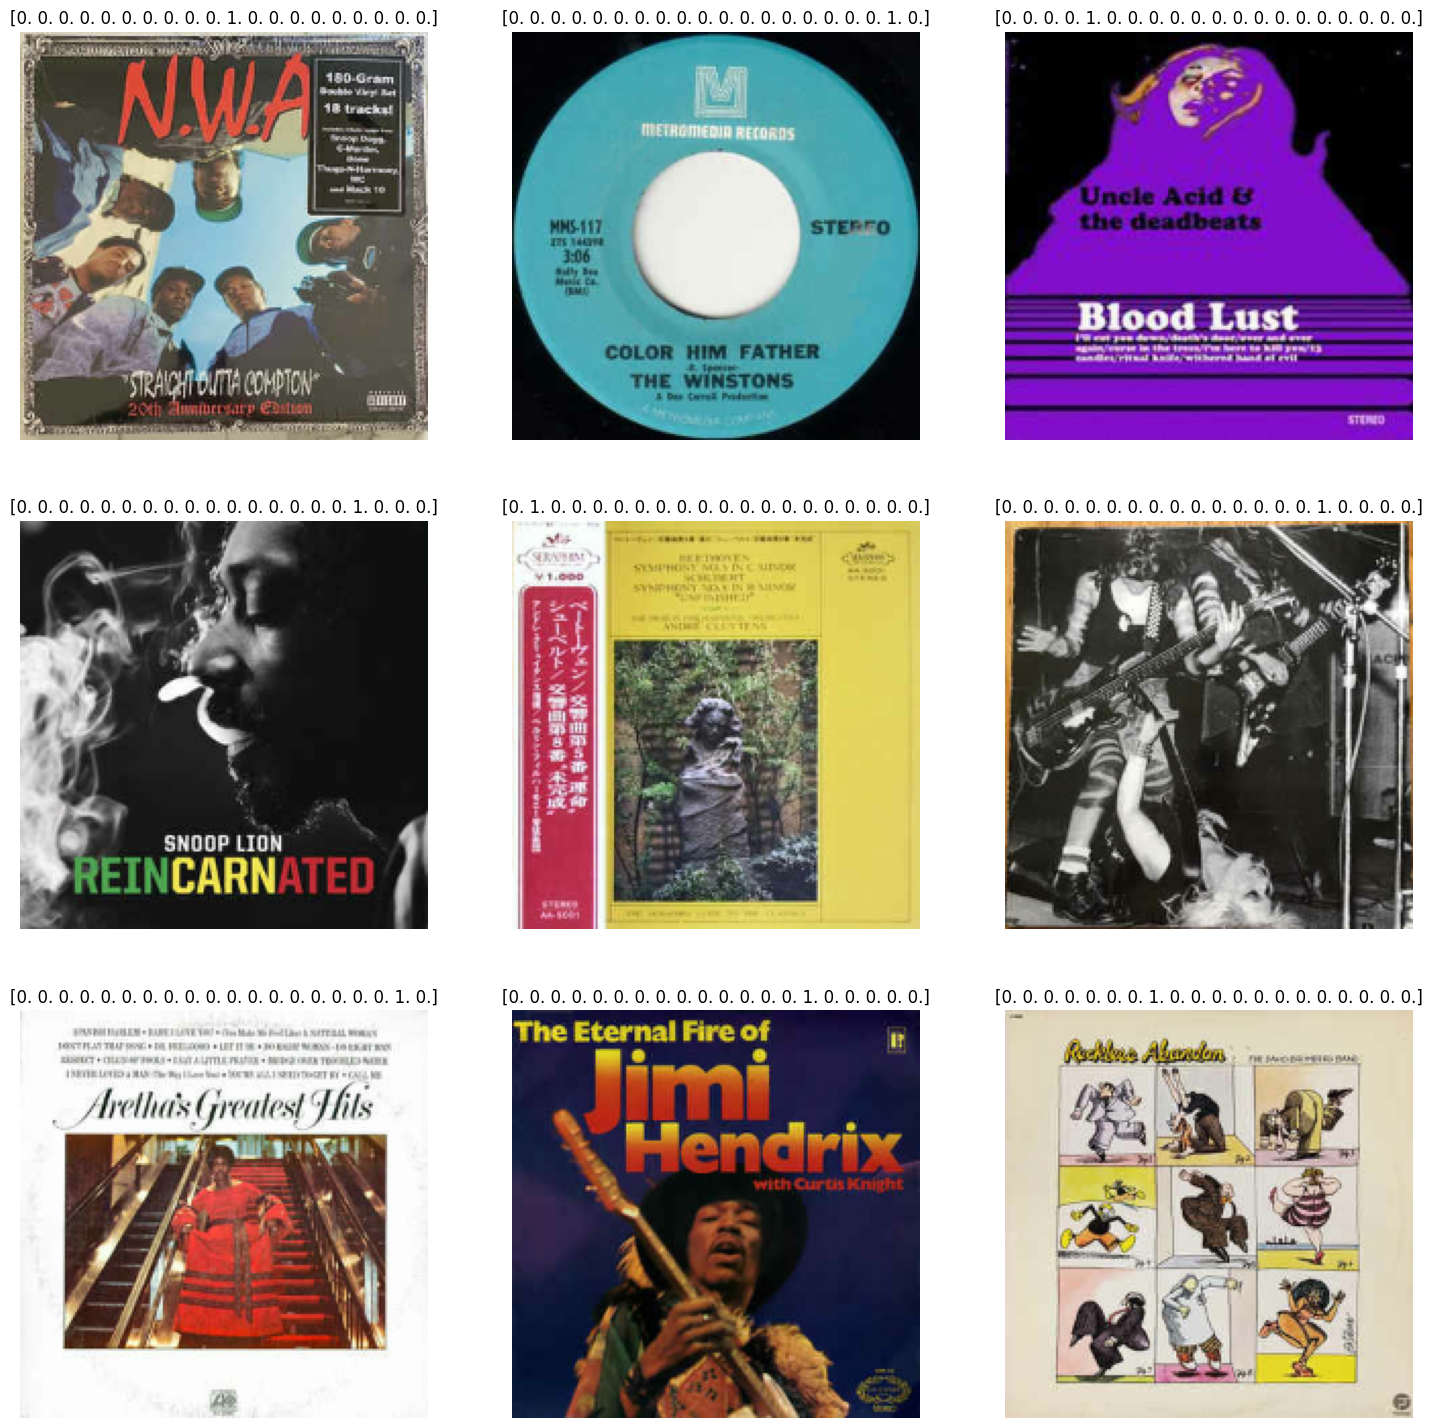

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x_train[i])
  plt.title(str( y_train[i]))
  plt.axis("off")

In [9]:
# from keras.applications.densenet import preprocess_input
# from keras.applications.densenet import DenseNet121
# from keras.models import Model
# from keras.layers import Dense
# from keras.metrics import Precision, Recall, AUC

# x_train = preprocess_input(train_ds_x)
# x_val = preprocess_input(val_ds_x)

# # Load DenseNet model
# model = DenseNet121(include_top=False, input_shape=(200, 200, 3), pooling='max')

# # Add a dense layer for classification with 20 outputs and sigmoid activation
# output = Dense(20, activation='softmax')(model.output)

# # Freeze base model layers to use it as a feature extractor
# for layer in model.layers:
#     layer.trainable = False

# # Create the final model
# final_model = Model(inputs=model.inputs, outputs=output)

# # Compile the model
# final_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", Precision(), Recall(), AUC()])

# # Train the model
# final_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))

# # Evaluate the model
# score = final_model.evaluate(x_val, y_val)

In [8]:
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Dense
from keras.metrics import Precision, Recall, AUC

# x_train = preprocess_input(train_ds_x)
# x_val = preprocess_input(val_ds_x)

model = DenseNet121(include_top=False, input_shape=(200, 200, 3), pooling='max')

for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 zero_padding2d
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_1
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block6_

In [19]:
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Dense
from keras.metrics import Precision, Recall, AUC

# x_train = preprocess_input(train_ds_x)
# x_val = preprocess_input(val_ds_x)

model = DenseNet121(include_top=False, input_shape=(200, 200, 3), pooling='max')

output = Dense(20, activation='softmax')(model.output)

for layer in model.layers[:141]:
    layer.trainable = False

for layer in model.layers[141:]:
    layer.trainable = True

final_model = Model(inputs=model.inputs, outputs=output)

final_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", Precision(), Recall(), AUC()])

final_model.fit(x_train, y_train, batch_size=128, epochs=2, validation_data=(x_val, y_val))

score = final_model.evaluate(x_val, y_val)

Epoch 1/2
125/125 [==============================] - 545s 4s/step - loss: 3.1733 - accuracy: 0.1752 - precision_4: 0.2828 - recall_4: 0.0420 - auc_4: 0.6883 - val_loss: 6.2823 - val_accuracy: 0.1890 - val_precision_4: 0.2725 - val_recall_4: 0.1053 - val_auc_4: 0.6986
Epoch 2/2
125/125 [==============================] - 51s 406ms/step - loss: 2.7211 - accuracy: 0.2235 - precision_4: 0.4593 - recall_4: 0.0847 - auc_4: 0.7521


In [20]:
final_model.save('saved_models/DenseNet_v3_2.keras')

In [14]:
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import Dense

# Recreate the base DenseNet121 model
base_model = DenseNet121(include_top=False, input_shape=(200, 200, 3), pooling='max', weights="densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5")

# Add the custom output layer
output = Dense(20, activation='softmax')(base_model.output)

# Freeze layers (as in the original code)
for layer in base_model.layers[:141]:
    layer.trainable = False
for layer in base_model.layers[141:]:
    layer.trainable = True

# Create the final model
v3_model = Model(inputs=base_model.inputs, outputs=output)
v3_model.load_weights('saved_models/DenseNet_v3_1.h5')
v3_model.save('saved_models/DenseNet_v3_1.h5')

In [62]:
from keras.metrics import Precision, Recall, AUC

v3_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", Precision(), Recall(), AUC()])
score = v3_model.evaluate(x_val, y_val)

125/125 ━━━━━━━━━━━━━━━━━━━━ 103s 806ms/step - accuracy: 0.2928 - auc_1: 0.6689 - loss: 2.7873 - precision_1: 0.0728 - recall_1: 0.9090


In [63]:
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")
print(f"Precision: {score[2]}")
print(f"Recall: {score[3]}")
print(f"AUC: {score[4]}")

Loss: 2.8231801986694336
Accuracy: 0.30550000071525574
Precision: 0.07237327843904495
Recall: 0.9070000052452087
AUC: 0.6664243340492249


In [40]:
# Initialize lists to store indices and predictions
correct_indices = []
incorrect_indices = []

# Iterate through the dataset to collect correct and incorrect predictions
for i in range(len(x_val)):
    predicted_class = np.argmax(v3_model.predict(x_val[i:i+1]))
    true_class = np.argmax(y_val[i])
    if predicted_class == true_class:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)
    
    # Stop when we have enough samples
    if len(correct_indices) >= 10 and len(incorrect_indices) >= 10:
        break

print("Correct Indices:", correct_indices)
print("Incorrect Indices:", incorrect_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━

In [43]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()
saliency = Saliency(v3_model, model_modifier=replace2linear, clone=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


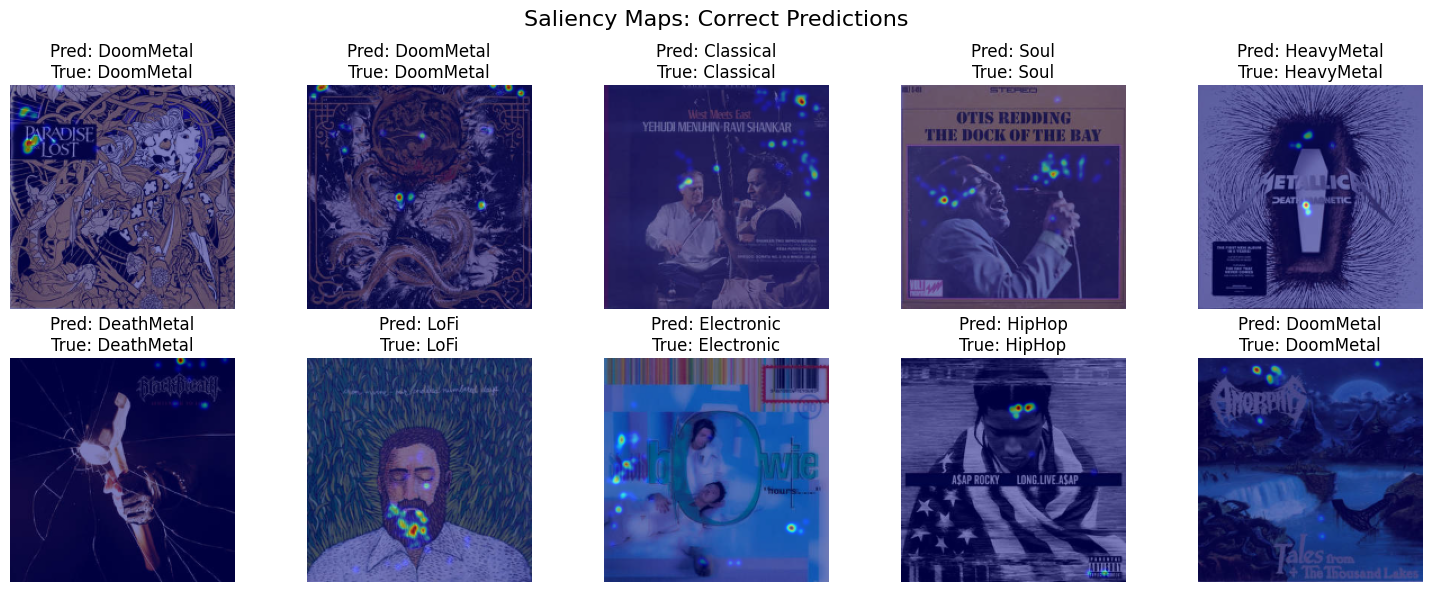

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


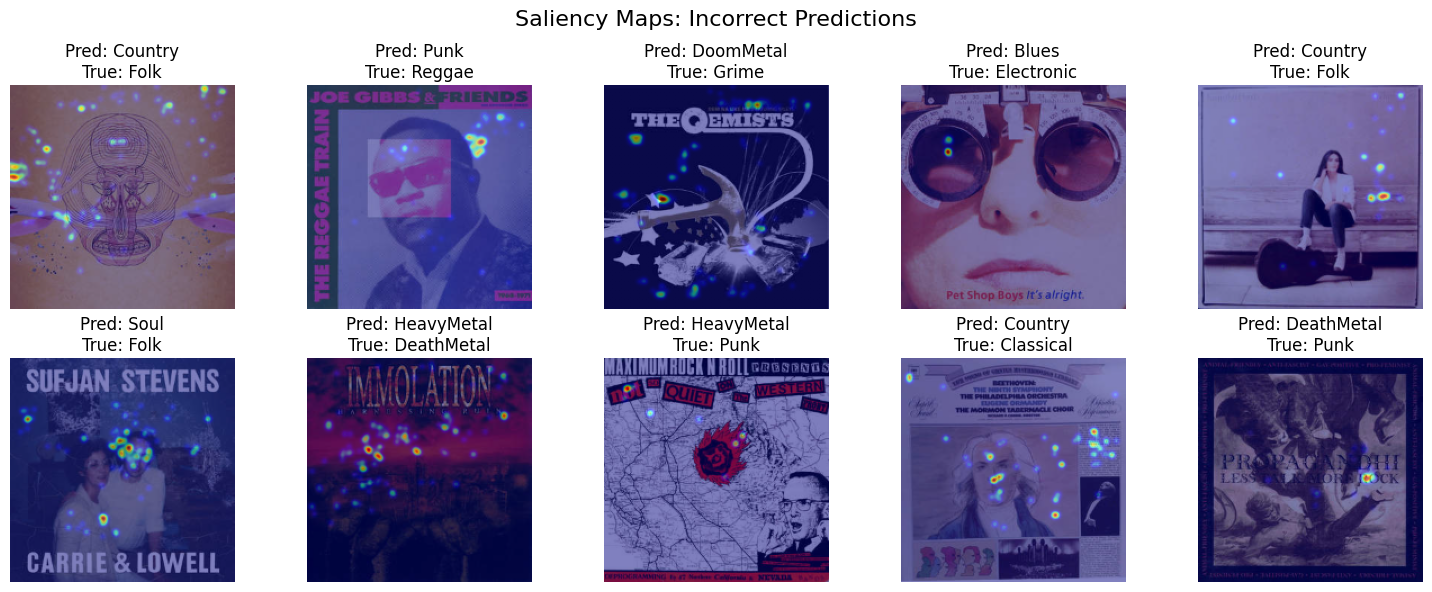

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

# Normalize and smooth saliency maps for better visualization
def process_saliency_maps(saliency_maps, threshold=0.5):
    saliency_maps = np.array(saliency_maps)
    saliency_maps -= saliency_maps.min()
    saliency_maps /= saliency_maps.max()  # Normalize
    saliency_maps[saliency_maps < threshold] = 0  # Apply threshold
    saliency_maps = [gaussian_filter(map, sigma=2) for map in saliency_maps]  # Smooth
    return saliency_maps

# Generate saliency maps for correct and incorrect predictions
correct_saliency_maps = []
incorrect_saliency_maps = []

for idx in correct_indices:
    image = x_val[idx:idx+1]
    true_class = np.argmax(y_val[idx])
    score_function = CategoricalScore([true_class])
    saliency_map = saliency(score_function, image)[0]
    correct_saliency_maps.append(saliency_map)

for idx in incorrect_indices:
    image = x_val[idx:idx+1]
    predicted_class = np.argmax(v3_model.predict(image))
    score_function = CategoricalScore([predicted_class])
    saliency_map = saliency(score_function, image)[0]
    incorrect_saliency_maps.append(saliency_map)

# Process saliency maps
correct_saliency_maps = process_saliency_maps(correct_saliency_maps)
incorrect_saliency_maps = process_saliency_maps(incorrect_saliency_maps)

# Plot saliency maps for correct predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    true_class = np.argmax(y_val[correct_indices[i]])
    predicted_class = np.argmax(v3_model.predict(x_val[correct_indices[i]:correct_indices[i] + 1]))
    ax.imshow(x_val[correct_indices[i]])  # Original image
    ax.imshow(correct_saliency_maps[i], cmap='jet', alpha=0.5)  # Overlay saliency map
    ax.set_title(f"Pred: {genres[predicted_class]}\nTrue: {genres[true_class]}")
    ax.axis('off')
fig.suptitle("Saliency Maps: Correct Predictions", fontsize=16)
plt.tight_layout()
plt.show()

# Plot saliency maps for incorrect predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    true_class = np.argmax(y_val[incorrect_indices[i]])
    predicted_class = np.argmax(v3_model.predict(x_val[incorrect_indices[i]:incorrect_indices[i] + 1]))
    ax.imshow(x_val[incorrect_indices[i]])  # Original image
    ax.imshow(incorrect_saliency_maps[i], cmap='jet', alpha=0.5)  # Overlay saliency map
    ax.set_title(f"Pred: {genres[predicted_class]}\nTrue: {genres[true_class]}")
    ax.axis('off')
fig.suptitle("Saliency Maps: Incorrect Predictions", fontsize=16)
plt.tight_layout()
plt.show()

This code block identifies the most frequently confused genres using a confusion matrix, then visualizes correct and misclassified samples for those genres.

125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 821ms/step


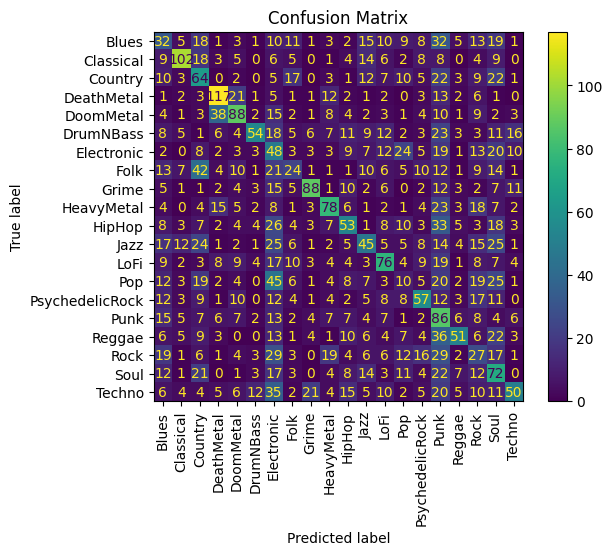

Most Confused Pair: Pop -> Electronic
Correct indices for 'Pop': [509, 1052, 1152, 1303, 2042, 2157, 2456, 2693, 3332, 3367]
Misclassified as 'Electronic': [19, 82, 181, 359, 466, 506, 518, 630, 950, 1023]


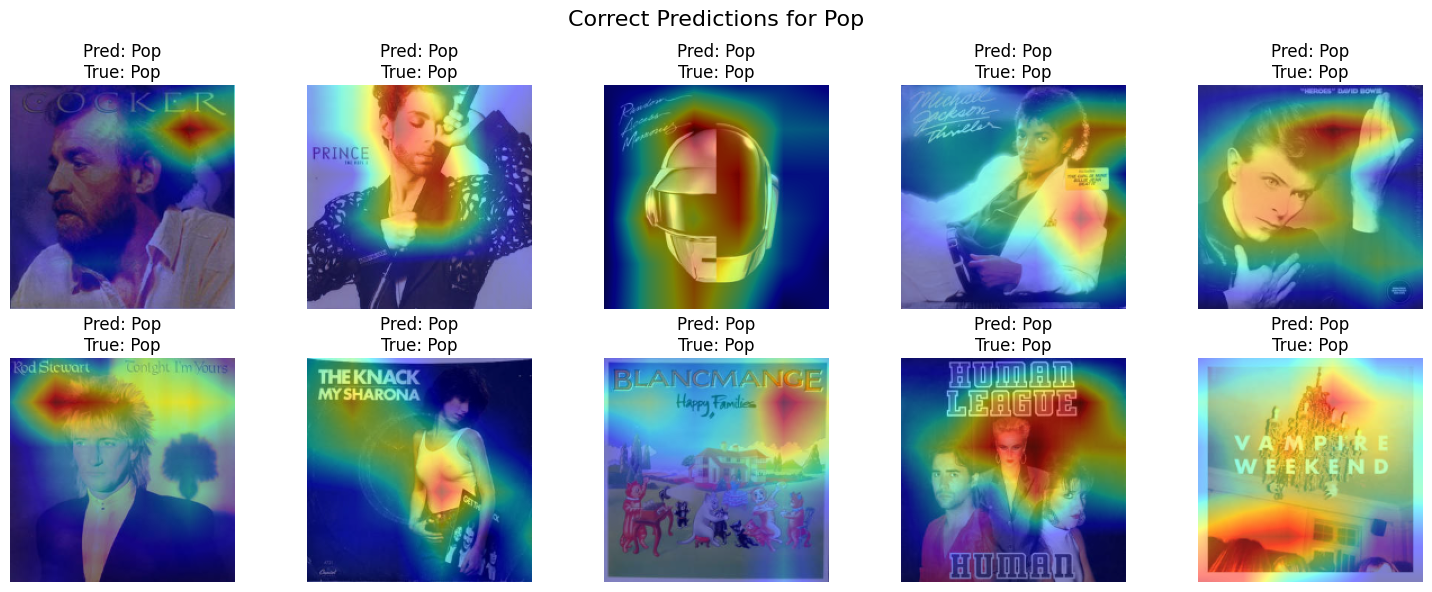

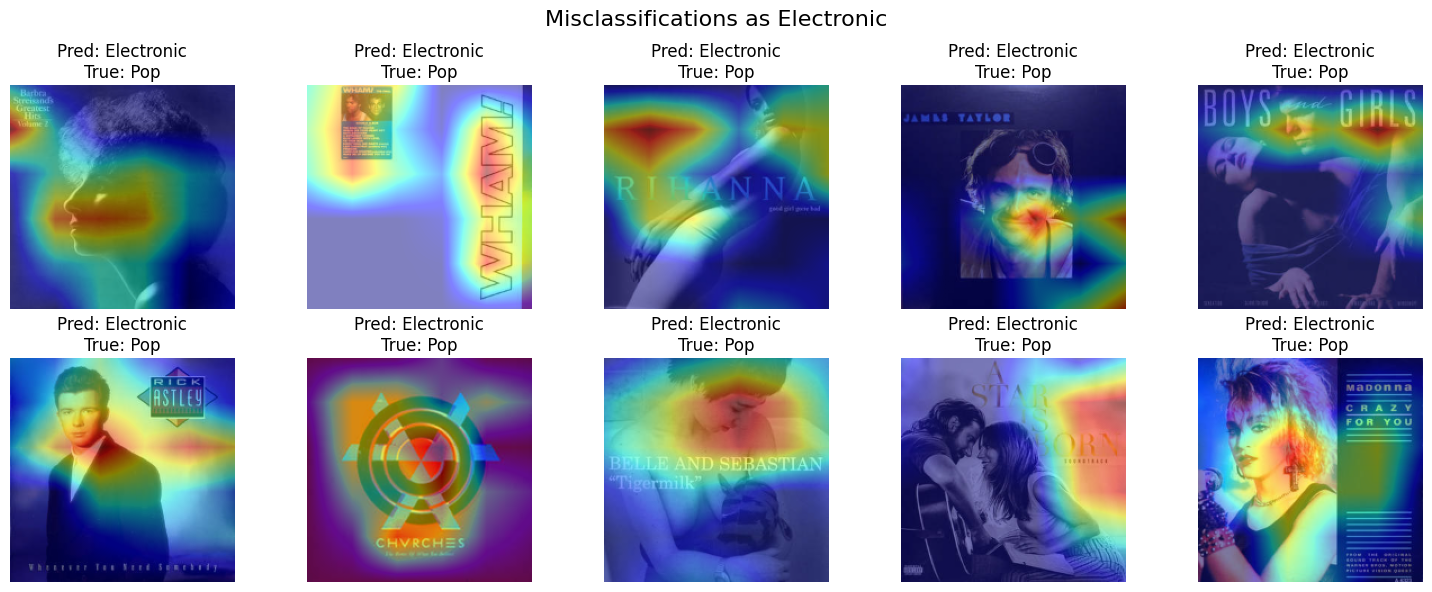

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# List of genres
genres = ['Blues', 'Classical', 'Country', 'DeathMetal', 'DoomMetal', 'DrumNBass', 
          'Electronic', 'Folk', 'Grime', 'HeavyMetal', 'HipHop', 'Jazz', 'LoFi', 
          'Pop', 'PsychedelicRock', 'Punk', 'Reggae', 'Rock', 'Soul', 'Techno']

# Get true and predicted labels
y_true = np.argmax(y_val, axis=1)
y_pred = np.argmax(v3_model.predict(x_val), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(genres)))

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(xticks_rotation=90, cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Identify the most frequently confused pair of genres
confused_pair = np.unravel_index(np.argmax(cm - np.diag(np.diag(cm))), cm.shape)
confused_true, confused_pred = confused_pair
print(f"Most Confused Pair: {genres[confused_true]} -> {genres[confused_pred]}")

# Collect samples of this genre pair
correct_indices = []
incorrect_indices = []

for i in range(len(x_val)):
    true_class = y_true[i]
    predicted_class = y_pred[i]
    if true_class == confused_true:
        if predicted_class == confused_true and len(correct_indices) < 10:
            correct_indices.append(i)
        elif predicted_class == confused_pred and len(incorrect_indices) < 10:
            incorrect_indices.append(i)
    if len(correct_indices) >= 10 and len(incorrect_indices) >= 10:
        break

print(f"Correct indices for '{genres[confused_true]}': {correct_indices}")
print(f"Misclassified as '{genres[confused_pred]}': {incorrect_indices}")

# Visualize saliency maps for correct and misclassified samples
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

gradcam = Gradcam(v3_model, model_modifier=ReplaceToLinear(), clone=False)

def visualize_gradcam(indices, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        idx = indices[i]
        true_class = y_true[idx]
        predicted_class = y_pred[idx]

        # Generate Grad-CAM heatmap
        score_function = CategoricalScore([predicted_class])
        heatmap = gradcam(score_function, x_val[idx:idx+1])
        heatmap = heatmap[0]  # Remove batch dimension

        # Overlay Grad-CAM on the original image
        ax.imshow(x_val[idx])  # Original image
        ax.imshow(heatmap, cmap='jet', alpha=0.5)  # Grad-CAM heatmap overlay
        ax.set_title(f"Pred: {genres[predicted_class]}\nTrue: {genres[true_class]}")
        ax.axis('off')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize correct and misclassified samples
visualize_gradcam(correct_indices, f"Correct Predictions for {genres[confused_true]}")
visualize_gradcam(incorrect_indices, f"Misclassifications as {genres[confused_pred]}")

This code block identifies and visualizes misclassified samples where the model is highly confident but wrong.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━

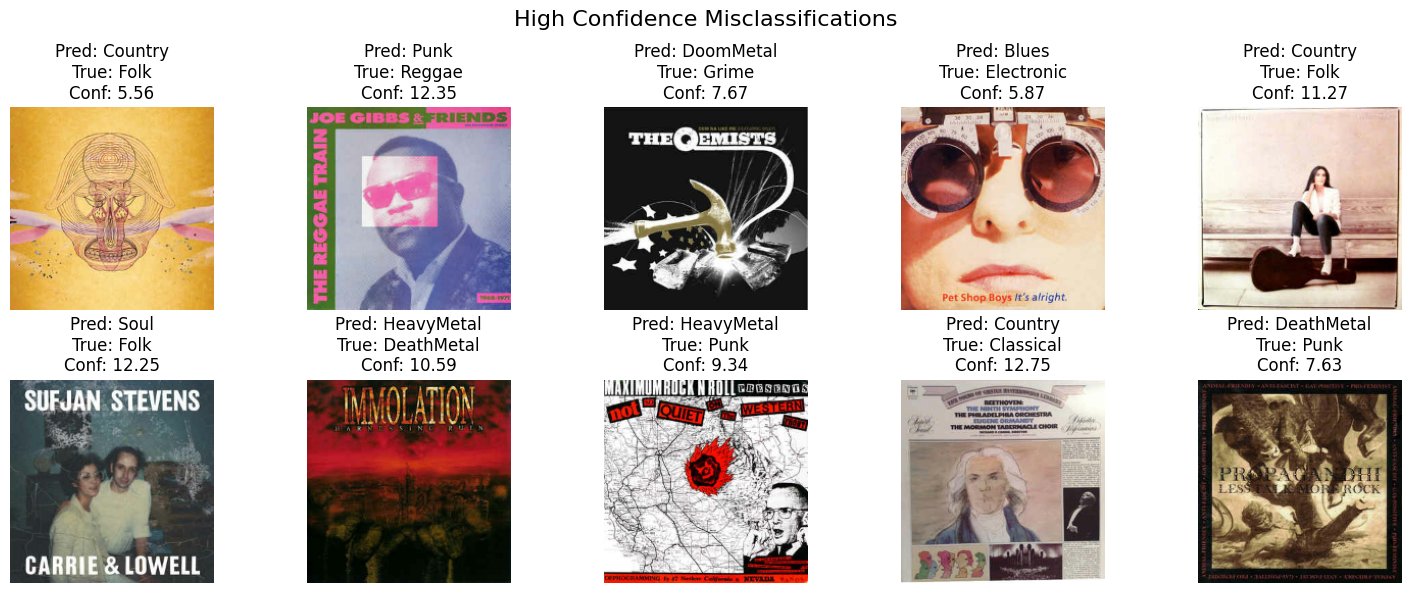

In [65]:
# Find high-confidence misclassified samples
high_confidence_misclassified = []

for i in range(len(x_val)):
    predicted_probs = v3_model.predict(x_val[i:i+1])[0]
    predicted_class = np.argmax(predicted_probs)
    true_class = np.argmax(y_val[i])
    confidence = predicted_probs[predicted_class]

    if predicted_class != true_class and confidence > 0.9:  # High-confidence misclassification
        high_confidence_misclassified.append((i, predicted_class, true_class, confidence))

# Display high-confidence misclassified samples
print("High Confidence Misclassified Samples:")
for idx, pred_class, true_class, conf in high_confidence_misclassified[:10]:
    print(f"Index: {idx}, Predicted: {genres[pred_class]}, True: {genres[true_class]}, Confidence: {conf:.2f}")

# Visualize high-confidence misclassifications
def visualize_high_confidence_misclassifications(samples, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        idx, pred_class, true_class, conf = samples[i]
        ax.imshow(x_val[idx])  # Original image
        ax.set_title(f"Pred: {genres[pred_class]}\nTrue: {genres[true_class]}\nConf: {conf:.2f}")
        ax.axis('off')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize top 10 high-confidence misclassifications
visualize_high_confidence_misclassifications(high_confidence_misclassified[:10], "High Confidence Misclassifications")

In [13]:
model = DenseNet121(include_top=False, input_shape=(200, 200, 3), pooling='max')

output = Dense(20, activation='softmax')(model.output)

for layer in model.layers[-16:]:
    layer.trainable = True

final_model = Model(inputs=model.inputs, outputs=output)

final_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", Precision(), Recall(), AUC()])

final_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))

score = final_model.evaluate(x_val, y_val)

Epoch 1/5
  4/110 [>.............................] - ETA: 18:25 - loss: 6.2992 - accuracy: 0.0742 - precision_1: 0.0831 - recall_1: 0.0566 - auc_1: 0.5488

KeyboardInterrupt: 

In [10]:
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")
print(f"Precision: {score[2]}")
print(f"Recall: {score[3]}")
print(f"AUC: {score[4]}")

Loss: 3.0610969066619873
Accuracy: 0.18816666305065155
Precision: 0.32578524947166443
Recall: 0.07433333247900009
AUC: 0.7059805393218994


In [9]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense

x_train = preprocess_input(train_ds_x)
x_val = preprocess_input(val_ds_x)

model = VGG16(include_top=False, input_shape=(200, 200, 3), pooling='max')

In [10]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_max_pooling2d


In [12]:
# from keras.applications.vgg16 import preprocess_input
# from keras.applications.vgg16 import VGG16
# from keras.models import Model
# from keras.layers import Dense
from keras.metrics import Precision, Recall, AUC

# x_train = preprocess_input(train_ds_x)
# x_val = preprocess_input(val_ds_x)

# model = VGG16(include_top=False, input_shape=(200, 200, 3), pooling='max')

output = Dense(20, activation='softmax')(model.output)

for layer in model.layers[:11]:
    layer.trainable = False

for layer in model.layers[11:]:
    layer.trainable = True

final_model = Model(inputs=model.inputs, outputs=output)

final_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", Precision(), Recall(), AUC()])

final_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))

score = final_model.evaluate(x_val, y_val)
print(score)

Epoch 1/5
125/125 [==============================] - 1828s 15s/step - loss: 5.7556 - accuracy: 0.0472 - precision: 0.0456 - recall: 0.0041 - auc: 0.5000 - val_loss: 2.9958 - val_accuracy: 0.0510 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4946
Epoch 2/5
125/125 [==============================] - 1766s 14s/step - loss: 2.9958 - accuracy: 0.0492 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 2.9960 - val_accuracy: 0.0477 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4946
Epoch 3/5
125/125 [==============================] - 1784s 14s/step - loss: 2.9958 - accuracy: 0.0477 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 2.9961 - val_accuracy: 0.0477 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4932
Epoch 4/5
125/125 [==============================] - 1791s 14s/step - loss: 2.9958 - accuracy: 0.0481 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5005 - val_loss: 2.9962 - val_

Saliency maps -> which pixels are most important
- Look at specific images that the model got very wrong or very right

distill.pub
- Visual guide for NNs
- Optimize an image s.t. it was a 'perfect' image for a given genre

In [13]:
final_model.save('saved_models/VGG_v1.keras')

In [14]:
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")
print(f"Precision: {score[2]}")
print(f"Recall: {score[3]}")
print(f"AUC: {score[4]}")

Loss: 2.9963178634643555
Accuracy: 0.04475000128149986
Precision: 0.0
Recall: 0.0
AUC: 0.49315789341926575
